# Statistics 141A Final Project

## Exploratory Data Analysis Project

In [32]:
library(ggplot2)
library(vcd)
library(MASS)
library(corrgram)
library(plyr)
library(cowplot)
library(hexbin)

In [3]:
setwd("C:/Users/Jeremy/Desktop/School/STA 141A/Final_Project")
d1 = read.csv("student-mat.csv")

In [4]:
#dropped G1 and G2
d1 = d1[,-c(31:32)]

In [33]:
fit = lm(G3~.,d1)
step = stepAIC(fit, direction="both")
step$anova # display results

Start:  AIC=1154.04
G3 ~ school + sex + age + address + famsize + Pstatus + Medu + 
    Fedu + Mjob + Fjob + reason + guardian + traveltime + studytime + 
    failures + schoolsup + famsup + paid + activities + nursery + 
    higher + internet + romantic + famrel + freetime + goout + 
    Dalc + Walc + health + absences

             Df Sum of Sq    RSS    AIC
- reason      3     31.33 6022.2 1150.1
- guardian    2     10.18 6001.0 1150.7
- Fjob        4     80.83 6071.7 1151.3
- nursery     1      1.76 5992.6 1152.2
- Fedu        1      2.39 5993.2 1152.2
- Pstatus     1      3.30 5994.1 1152.3
- traveltime  1      8.48 5999.3 1152.6
- paid        1      8.53 5999.4 1152.6
- activities  1      9.26 6000.1 1152.7
- internet    1     10.91 6001.7 1152.8
- Dalc        1     11.42 6002.3 1152.8
- school      1     14.18 6005.0 1153.0
- famrel      1     14.96 6005.8 1153.0
- address     1     15.04 6005.9 1153.0
- Walc        1     19.03 6009.9 1153.3
- health      1     20.34 6011.2 1153

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,355,5990.833,1154.044
- reason,3,31.328693,358,6022.161,1150.105
- guardian,2,10.918410,360,6033.080,1146.820
- Fjob,4,88.573827,364,6121.654,1144.577
- Fedu,1,1.460092,365,6123.114,1142.671
- nursery,1,2.789976,366,6125.904,1140.851
- Dalc,1,4.347820,367,6130.252,1139.132
- Walc,1,3.955184,368,6134.207,1137.386
- Pstatus,1,4.990484,369,6139.197,1135.708
- internet,1,4.842193,370,6144.039,1134.019


This above stepwise process gives us the final model with which we will proceed for the next part of our analysis.

In [34]:
mod = lm(G3~sex + age + famsize + Medu + Mjob + studytime + failures + 
schoolsup + famsup + romantic + freetime + goout + absences + Dalc + Walc, data=d1)
summary(mod)


Call:
lm(formula = G3 ~ sex + age + famsize + Medu + Mjob + studytime + 
    failures + schoolsup + famsup + romantic + freetime + goout + 
    absences + Dalc + Walc, data = d1)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5239  -1.7739   0.3229   2.8448   8.8652 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  13.48855    3.27643   4.117 4.72e-05 ***
sexM          0.95057    0.47578   1.998  0.04645 *  
age          -0.28047    0.18201  -1.541  0.12416    
famsizeLE3    0.72991    0.46670   1.564  0.11866    
Medu          0.56759    0.26174   2.168  0.03075 *  
Mjobhealth    1.43387    1.01880   1.407  0.16013    
Mjobother    -0.16623    0.66523  -0.250  0.80281    
Mjobservices  0.98556    0.73737   1.337  0.18217    
Mjobteacher  -0.84729    0.96700  -0.876  0.38148    
studytime     0.58141    0.26917   2.160  0.03141 *  
failures     -1.85786    0.30368  -6.118 2.38e-09 ***
schoolsupyes -1.25105    0.65463  -1.911  0.05675 .  

This shows our final regression model with coefficients that were deemed significant enough to keep by our stepwise process.

In [35]:
#subset the data using the variables above, d2 is our final dataset
d2 = d1[,c(2,5,7,14,15,16,17,23,25,26,27,28,30,31)]
#this shows frequency of grades, missing 1-3 for some reason
grade_count = count(d2$G3) #shows tally of grades
grade_count

x,freq
0,38
4,1
5,7
6,15
7,9
8,32
9,28
10,56
11,47
12,31


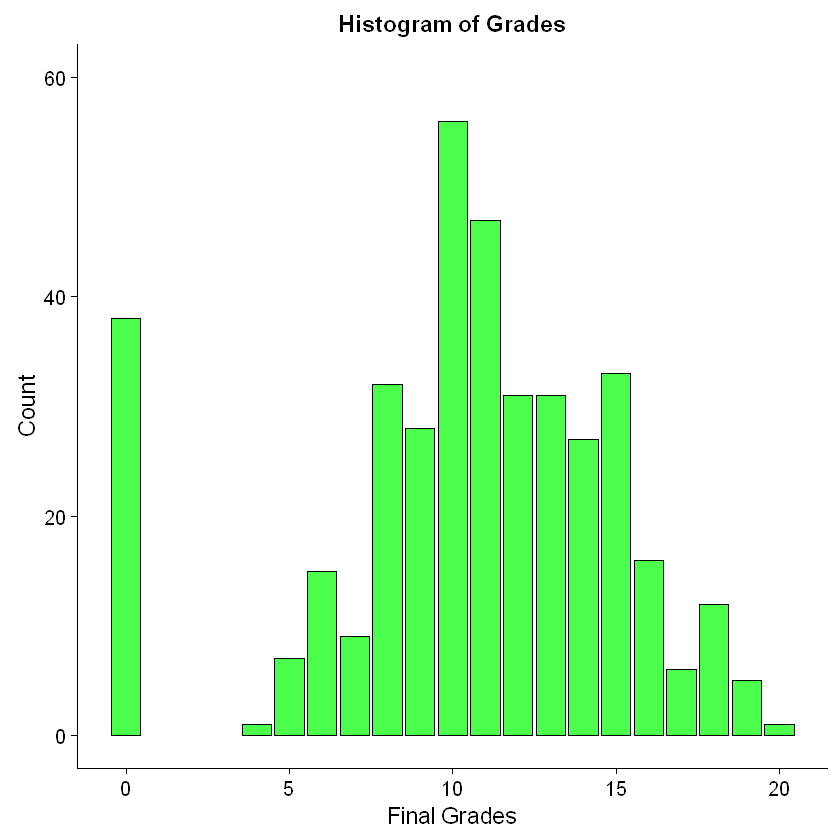

In [36]:
grade_frequencies = ggplot(d2, aes(G3)) + geom_bar(color ="black",  fill = "green", alpha = 0.7) +
  labs(title = "Histogram of Grades") + ylim(c(0, 60)) + labs(x = "Final Grades", y = "Count")
grade_frequencies

Above are a numerical tally of grades and a histogram to get an idea of how student grades were distributed across the sample. We see a cluster at 0 which seems like an issue on the sampling side of this experiment as there are no entries of grades 1, 2, or 3.

In [37]:
d2$schoolsup = revalue(d2$schoolsup, c(yes = "1", no = "0"))
d2$famsup = revalue(d2$famsup, c(yes = "1", no = "0"))
d2$romantic = revalue(d2$romantic, c(yes = "1", no = "0"))
d2$famsize = revalue(d2$famsize, c(LE3 = "0", GT3 = "1"))
d2$sex = revalue(d2$sex, c(M = "0", F = "1"))
#convert to correct type for analysis
d2$schoolsup = as.numeric(as.character(d2$schoolsup))
d2$famsup = as.numeric(as.character(d2$famsup))
d2$romantic = as.numeric(as.character(d2$romantic))
d2$famsize=as.numeric(as.character(d2$famsize))
d2$sex = as.numeric(as.character(d2$sex))

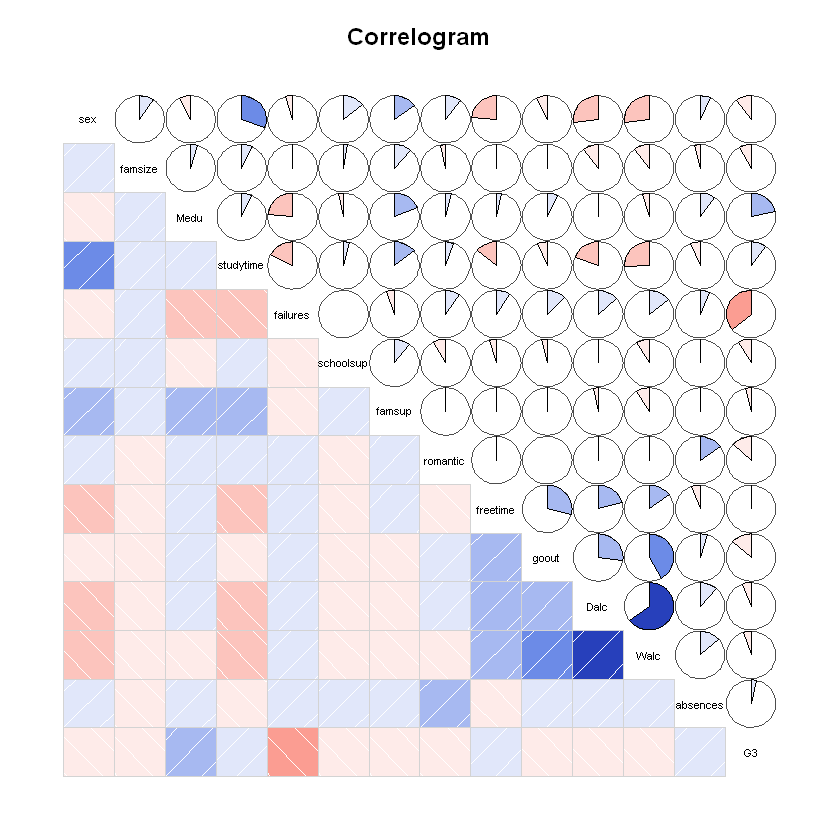

In [38]:
corrgram(d2,lower.panel = panel.shade, upper.panel = panel.pie, text.panel = panel.txt, main = "Correlogram")

We created a correlogram between all the variables that we had determined to possibly be significant as well as a few variables who's relationships we were interested in due to social stigma such as the relationship between alcohol consumption and grades.

## Below we examine the relationship in the form of probablility distribution functions between a number of variables.

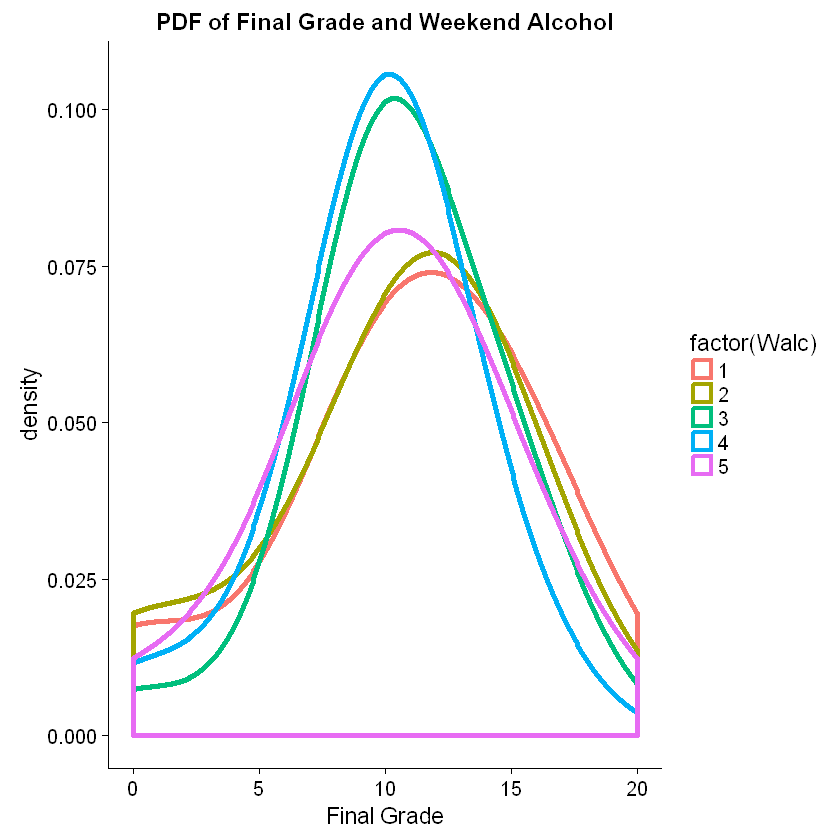

In [39]:
walc_g3 <- ggplot(d2, aes(G3, colour=factor(Walc))) + geom_density(adjust=2, alpha = 0.5, size = 1.5) +
  ggtitle("PDF of Final Grade and Weekend Alcohol") + labs(x = "Final Grade")
walc_g3

Here we see something interesting that would not have necessarily been expected going in to this analysis and that is that it appears that all the reported levels of alcohol consumption on the weekends have a roughly similar probability of recieving any given grade. The lowest drinkers are expected to have a slightly higher probability of receiving the highest grade than the higher levels of drinking. However, the pdf's are more overlayed than many people would have guessed.

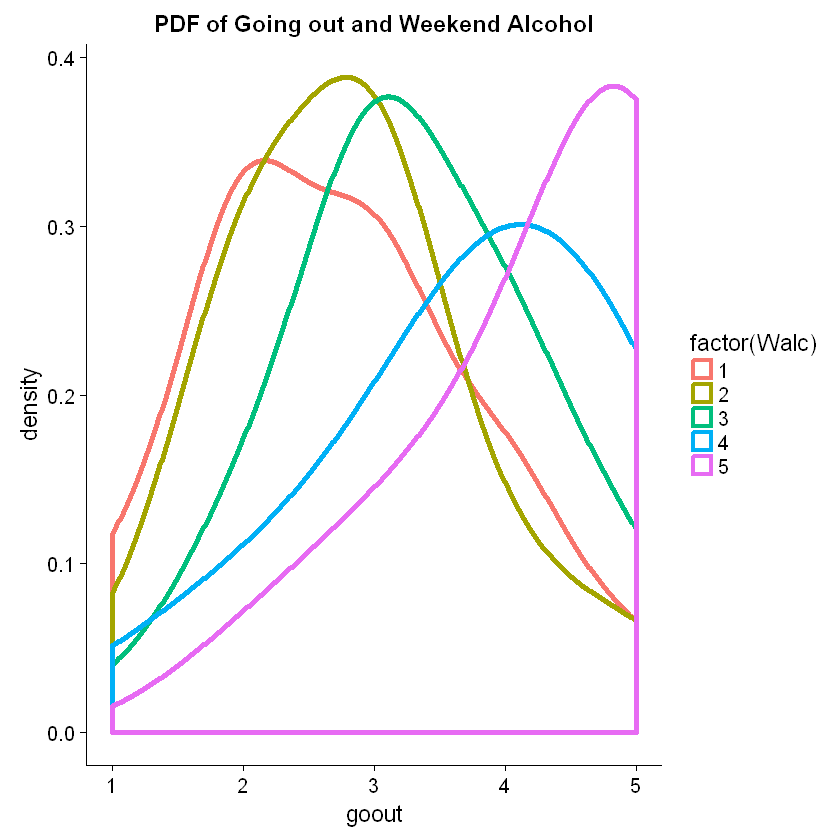

In [40]:
out_walc <- ggplot(d2, aes(goout, colour=factor(Walc))) + geom_density(adjust=2, alpha = 0.5, size = 1.5) +
  ggtitle("PDF of Going out and Weekend Alcohol")
out_walc

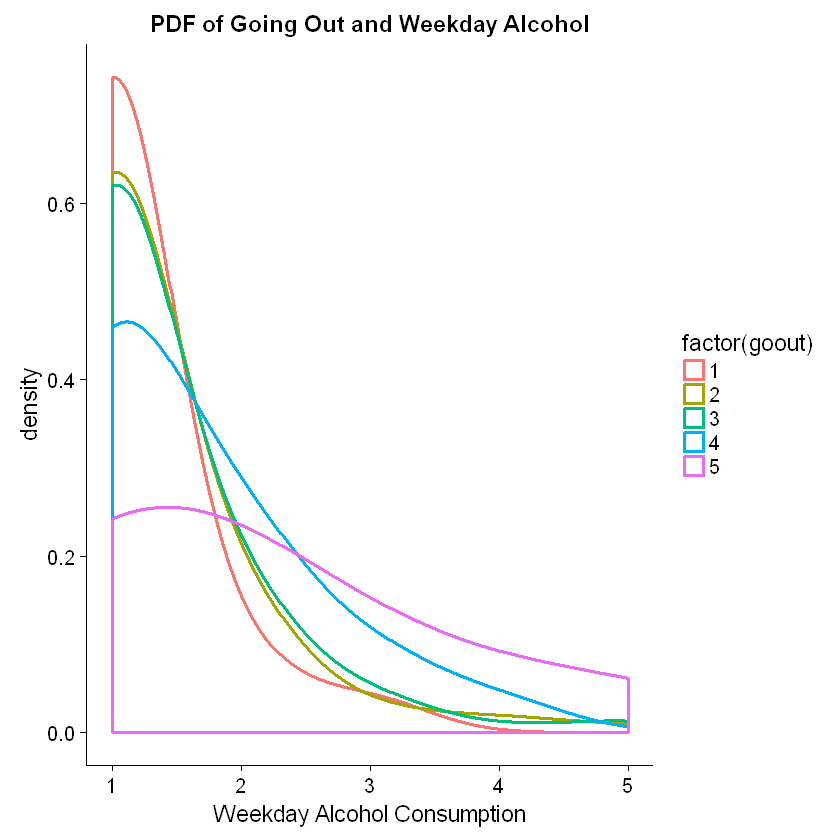

In [41]:
out_dalc <- ggplot(d2, aes(Dalc, colour=factor(goout))) + geom_density(adjust=2, alpha = 0.5, size = 1) +
  ggtitle("PDF of Going Out and Weekday Alcohol") + labs(x = "Weekday Alcohol Consumption")
out_dalc

x,freq
1,276
2,75
3,26
4,9
5,9


x,freq
1,151
2,85
3,80
4,51
5,28


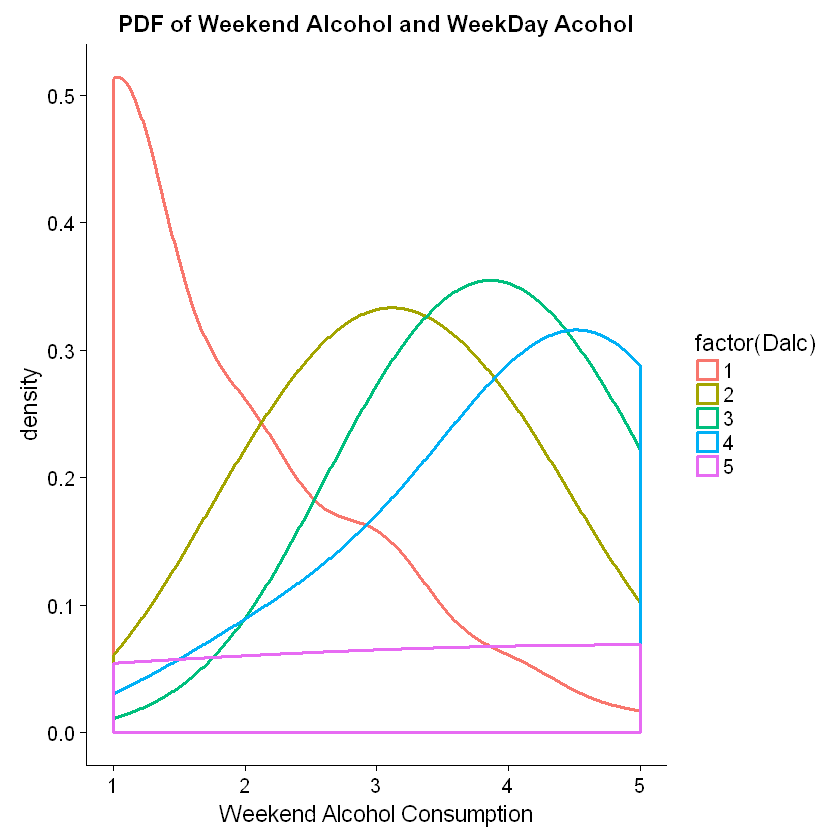

In [42]:
dalc_walc <- ggplot(d2, aes(Walc, colour=factor(Dalc))) + geom_density(adjust=2, alpha = 0.5, size = 1) +
  ggtitle("PDF of Weekend Alcohol and WeekDay Acohol") + labs(x = "Weekend Alcohol Consumption")
dalc_walc
count(d2$Dalc)
count(d2$Walc)

Note that there are very few data points representing high weekday alcohol consumtion so we will be cautious when predicting anything based off that.

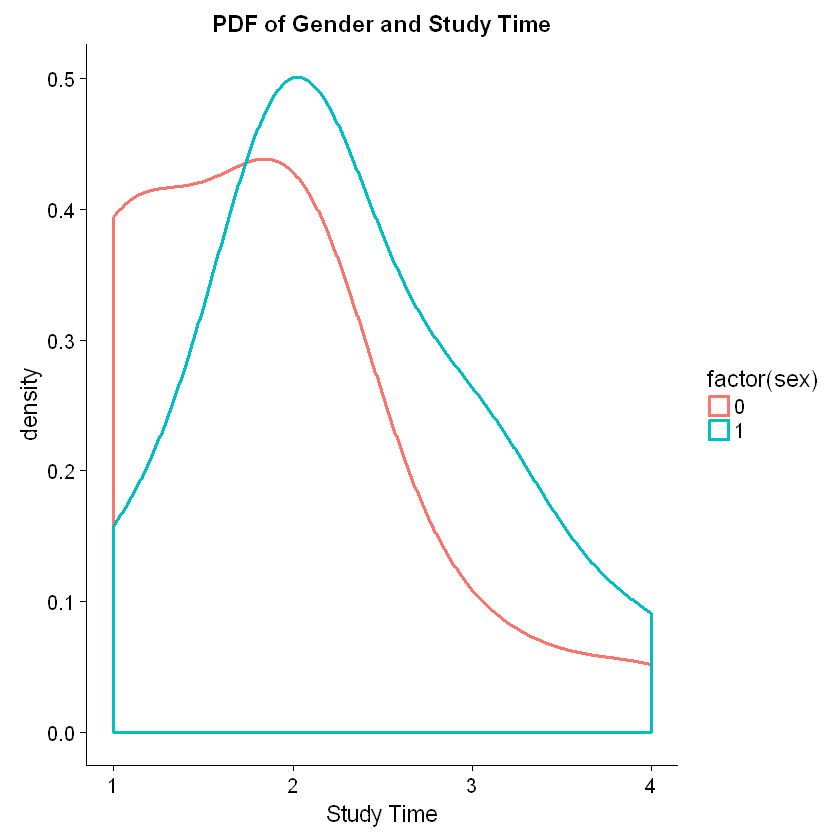

In [43]:
sex_study <- ggplot(d2, aes(studytime, colour=factor(sex))) + geom_density(adjust=2, alpha = 0.5, size = 1) +
  ggtitle("PDF of Gender and Study Time") + labs(x = "Study Time")
sex_study

This shows that we expect Female Students to on average spend more time studying than Male Students.

## This next section examines the relationship between a few variables using bar charts and similar methods

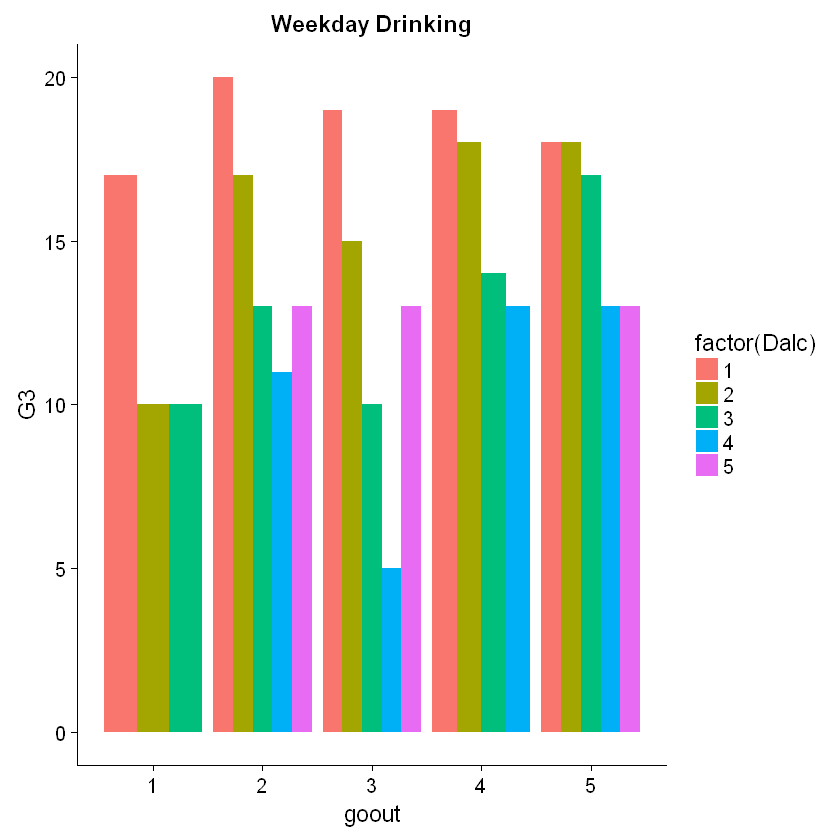

In [44]:
day = ggplot(d2, aes(goout, G3)) + geom_bar(aes(fill = factor(Dalc)), position = "dodge", stat="identity") + ggtitle("Weekday Drinking")
day

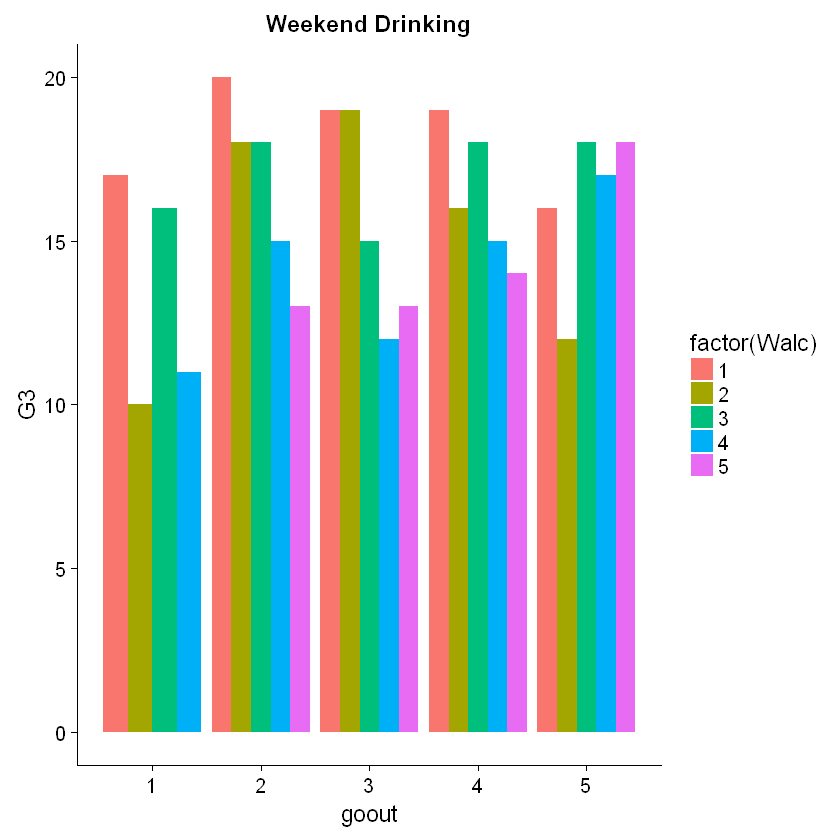

In [45]:
end = ggplot(d2, aes(goout, G3)) + geom_bar(aes(fill = factor(Walc)), position = "dodge", stat="identity") + ggtitle("Weekend Drinking")
end

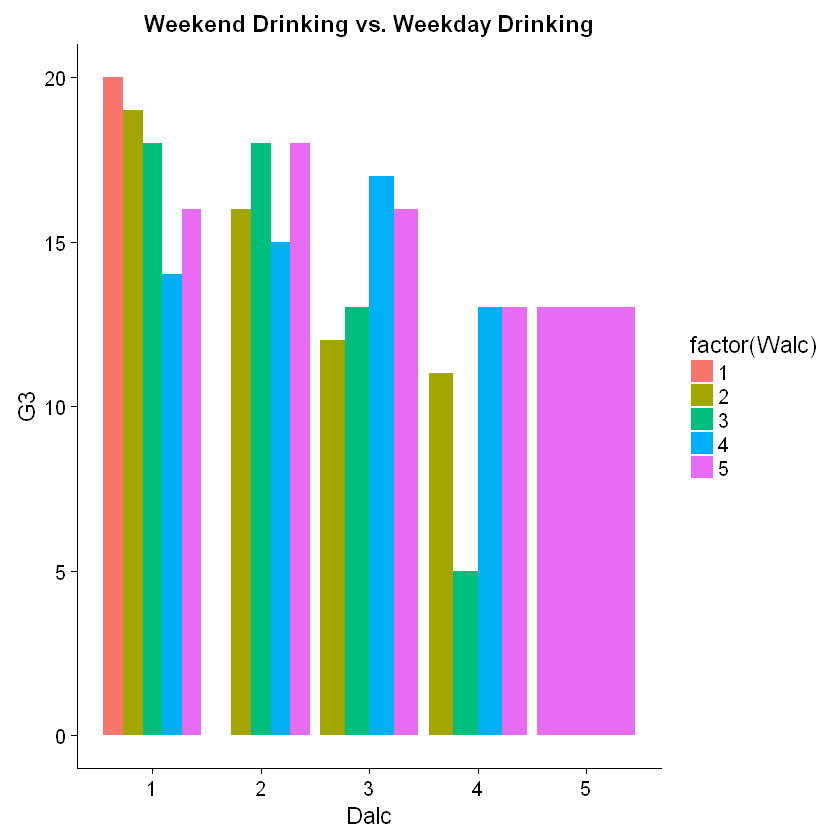

In [46]:
ggplot(d2, aes(Dalc, G3)) + geom_bar(aes(fill = factor(Walc)), position = "dodge", stat="identity") + ggtitle("Weekend Drinking vs. Weekday Drinking")

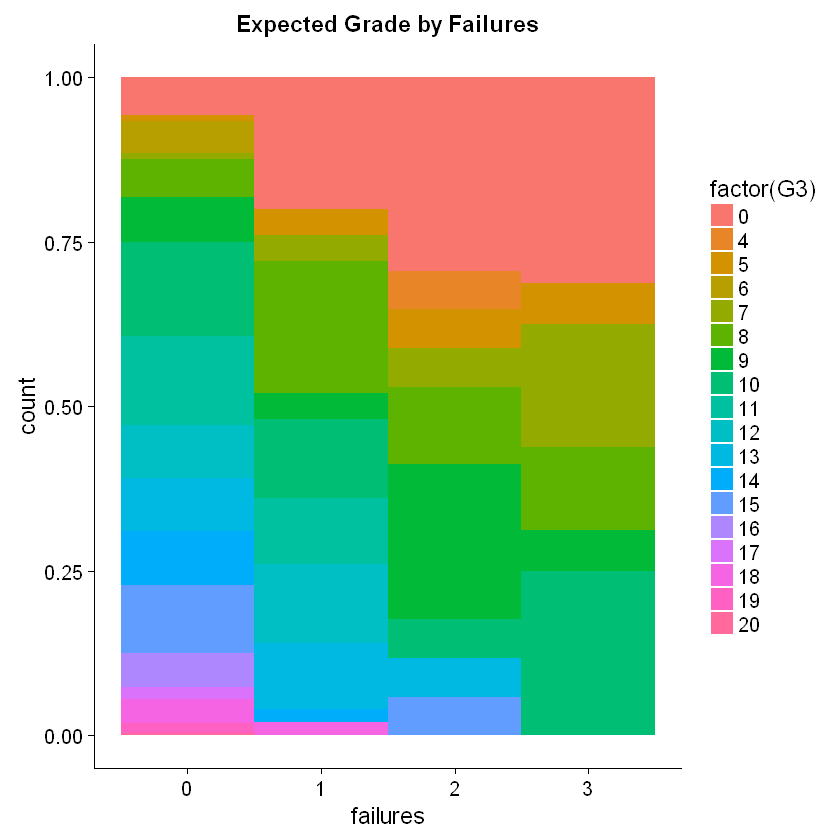

In [47]:
fail_g3 <- ggplot(d2, aes(failures)) + ggtitle("Expected Grade by Failures") + geom_histogram(aes(fill=factor(G3)),binwidth=1, position="fill")
fail_g3

This shows us expected grade received in the calss based on history of failing classes. Simple trends identified are that if you have never failed a class you have a lower probability of getting a grade of 0 in the class than if you have failed 3 or more classes previously. Also, if you have failed at least two classes you have pretty much no expected chance of getting a perfect score of 20 in the class.

## We looked next at the relationship between School/Family Support and Final Grade

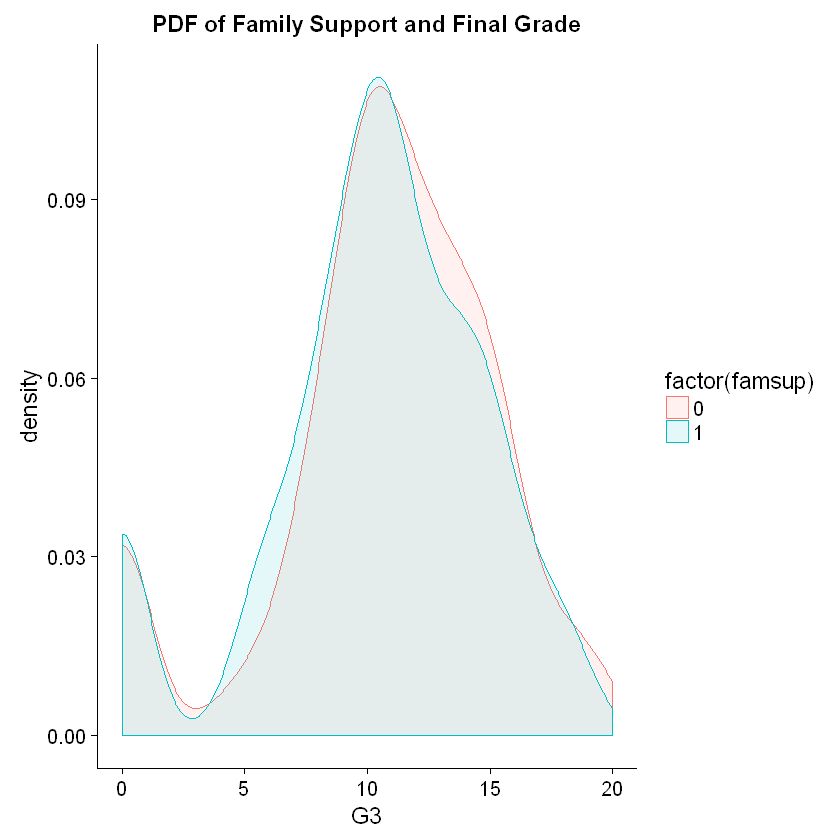

In [48]:
school_g3 <- ggplot(d2, aes(G3, fill = factor(famsup), colour = factor(famsup))) + geom_density(alpha = 0.1) +
  labs(title = "PDF of Family Support and Final Grade")
school_g3

Very little difference in the above graph and potential issue with the problem in the data set being clustered around zero and not having values 1-3

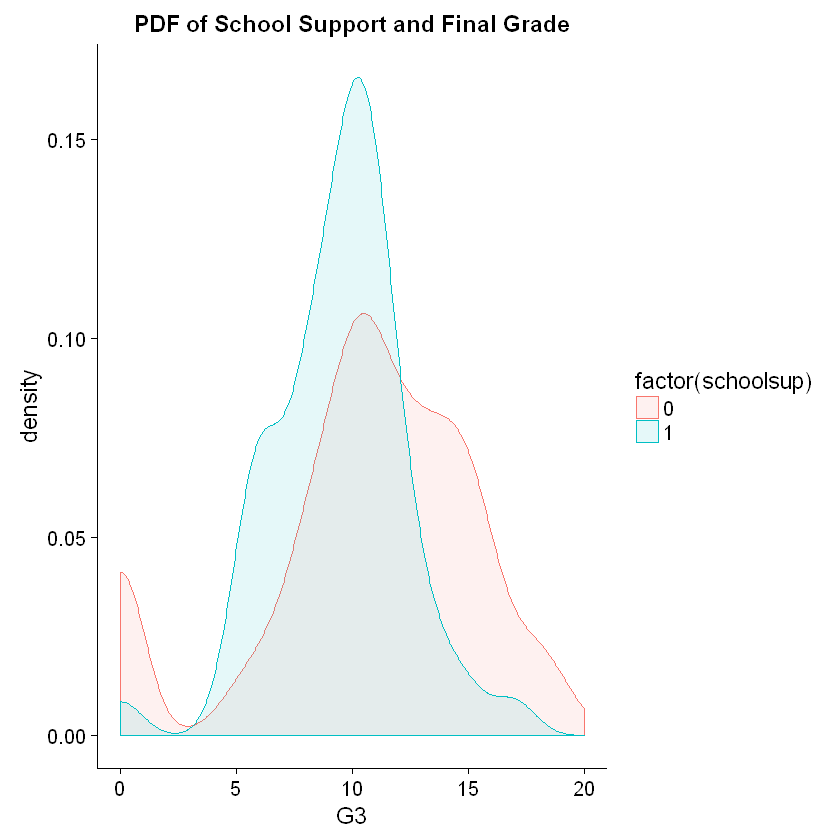

In [49]:
fam_g3 <- ggplot(d2, aes(G3, fill=factor(schoolsup), colour = factor(schoolsup))) + geom_density(alpha = 0.1) +
  labs(title = "PDF of School Support and Final Grade")
fam_g3

We see that students not receiving school support are slightly more likely to receive a higher grade on average. This however could be due to the fact that they are the students who naturally do better in school anyway and it is possible that this gap would be larger between the two groups of students if the group who are receiving school support were not. Also the strange cluster around zero and missing values for grades 1-3 are possibly throwing this off a little bit so we are cautious to read too much in to it.

## Quick examination of absences

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


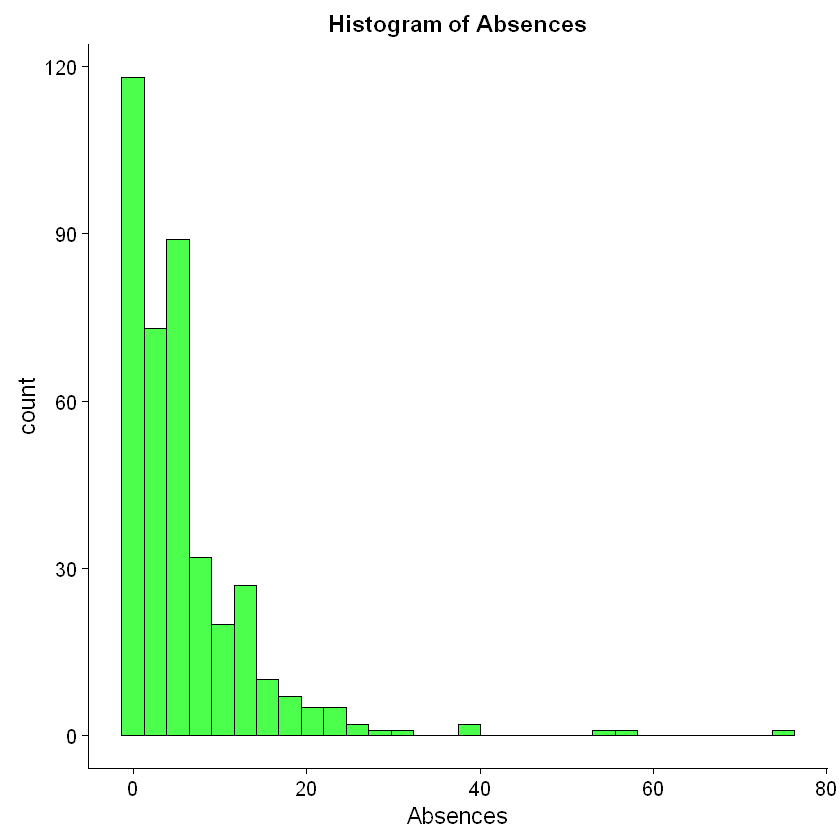

In [50]:
abs_hist = ggplot(d2, aes(absences)) + geom_histogram(fill = "green", alpha = "0.7", color = "black") +
  labs(title = "Histogram of Absences", x = "Absences")
abs_hist

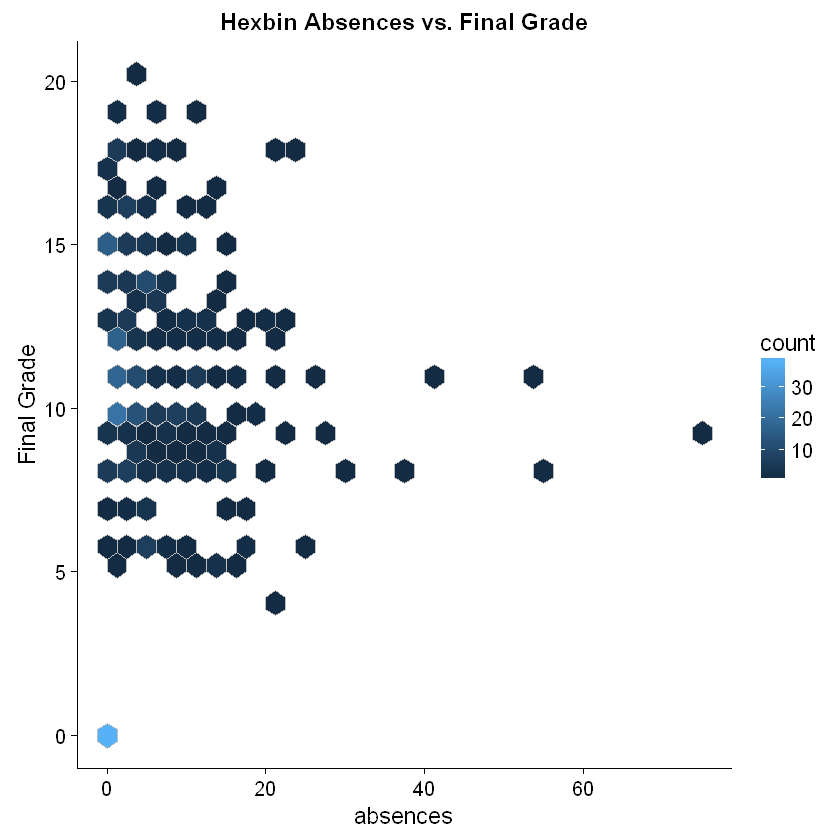

In [51]:
abs_hex <- ggplot(d2, aes(absences, G3)) + stat_binhex(colour="grey") + labs(title = "Hexbin Absences vs. Final Grade") +
  labs(y = "Final Grade")
abs_hex

## Breaking down grades across family sizes

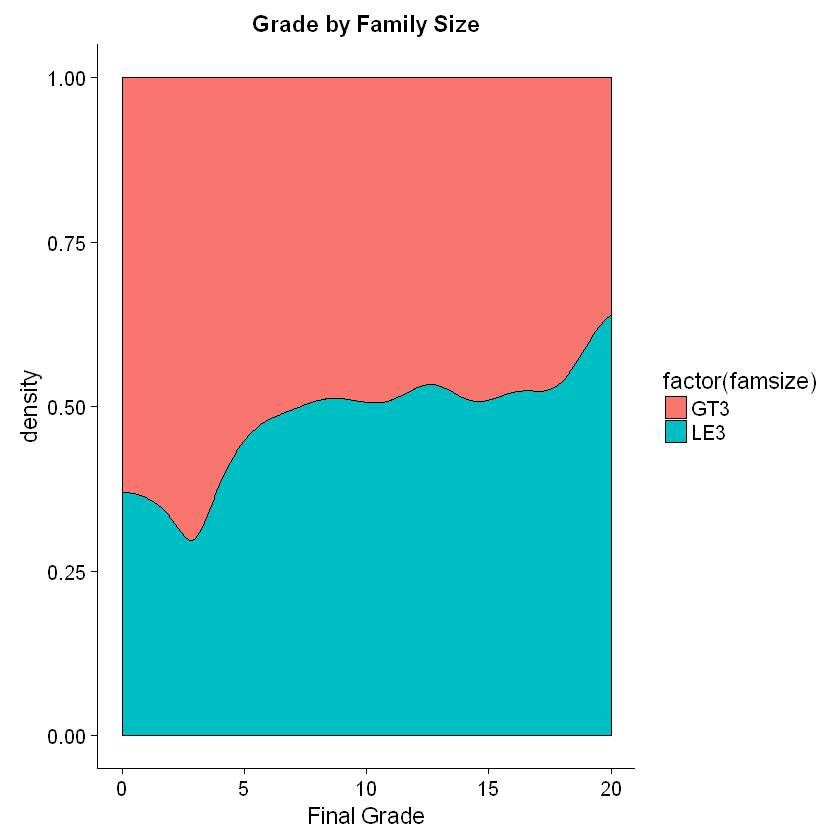

In [52]:
ggplot(d1, aes(G3)) + ggtitle("Grade by Family Size") + geom_density(aes(fill=factor(famsize)), position="fill") +
  labs(x = "Final Grade")

We see that students of a family size three or smaller are more likely to receive higher grades and students of families size larger than three however the dataset provided to us was unclear as to what exactly these family categories entail. For example a family of size three could be two parents and an only child or it could be a single parent supporting two kids which have very different hypothetical implications.

Data found at: https://www.kaggle.com/uciml/student-alcohol-consumption
Statistics 141A Course at UC Davis Final Project Exploratory Data Analysis Contributors:
Jeremy Weidner,
Audrey Chu,
Weizhou Wang